# 6. Timing and Style


## 6.1 Algorithmic complexity

>"Debugging time increases as a square of the program’s size." - Chris Wenham

So far we've mostly worked with toy examples. Our examples have been small and they run fast. However, at some point you will reach the limits of what is possible with your current machine, and this is where having a good understanding of **complexity** comes into play. 

Not all algorithms are built the same, and in general algorithms can be described in terms of the computation time they need to run and the amount of memory they need to make the computation. These two properties are known as **"computational complexity"** and **"memory complexity"** respectively.

The complexity of an algorithm (typically a function) with respect to computation and memory are typically described using what is called **"big O notation"**. This is just a way of describing the complexity of the algorithm in regard to the number of operations or required memory it needs to perform the computation for various input sizes. Where a notation like $O(n^2)$ means that the function requires squared computational time or available memory as a function of the input size $n$.

Let's look at a classic example of computational complexity, the *pairwise distance function*. In this example, we have a $n\times d$ matrix $X$ which is a a set of $n$ vector coordinates with $d$ dimensions, and we want to know the Euclidean distance between each vector $x_{i} \in X$ and all the other vectors $x_{j} \in X$ where $j \neq i$ for $i,j = 0,1,2,3...,n$. Our distances calculations should then produce the $n\times n$ matrix $D$, which contains all the pairwise distances between vectors.

Naively we can do this with a nested loop...

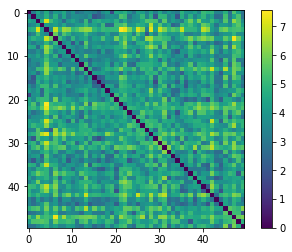

In [24]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
d = 10
X = np.random.normal(size=(n, d))

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def loop_pairwise_distances(X):
    D = np.zeros((n, n))
    for idx in range(n):
        for jdx in range(n):
            D[idx, jdx] = distance(X[idx], X[jdx])
    return D

D = loop_pairwise_distances(X)

plt.imshow(D)
plt.colorbar()
plt.show()

Notice that this pairwise distance algorithm has low memory complexity as we are only calculating a single distance at a time, but there is very high computational complexity as we are having to do many operations repeatedly—$O(n^2)$ computations in this case. In fact, just for good measure, let's time our function to see how long it takes to run. We can do this with some jupyter magic using the `%timeit` command...

In [15]:
%timeit loop_pairwise_distances(X)

18.1 ms ± 274 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


That's not bad, but watch what happens when X gets bigger...

In [25]:
n = 500
X = np.random.normal(size=(n, d))
%timeit loop_pairwise_distances(X)

1.81 s ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Yikes! That's getting pretty slow! There must be a better way. Luckily numpy allows us to **vectorize** these computations, which increases our memory complexity, but "decreases" our computational complexity. We can achieve this using **broadcasting** like so...

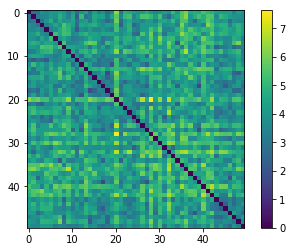

In [27]:
import numpy as np
import matplotlib.pyplot as plt

n = 50

X = np.random.normal(size=(n, d))

def vectorized_pairwise_distances(X):
    D = np.sqrt(np.sum((X - X[:, np.newaxis])**2, axis=-1))
    return D

D = vectorized_pairwise_distances(X)

plt.imshow(D)
plt.colorbar()
plt.show()

Now let's check how fast this is...

In [28]:
n = 500
X = np.random.normal(size=(n, d))
%timeit loop_pairwise_distances(X)
%timeit vectorized_pairwise_distances(X)

1.78 s ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
13.1 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


That's much faster! And just to make sure our functions give the same results, let's check this with numpy...

In [29]:
np.allclose(loop_pairwise_distances(X), vectorized_pairwise_distances(X))

True

Great! We managed to increase the speed of our function using numpy, but this comes at a cost. The major change is this piece of code `X - X[:, np.newaxis]` which calculates the pairwise differences using broadcasting. Let's take a closer look...

In [31]:
pairwise_differences = X - X[:, np.newaxis]
print(pairwise_differences.shape)

(500, 500, 10)


That's a big array! Compared to our pairwise distance matrix which is only $n\times n$, this array is $n\times n \times d$. This means the memory complexity of our vectorized pairwise distance algorithm is actually $O(dn^2)$, which is significantly higher. 

In general, algorithmic complexity is a constant trade-off between memory complexity and computational complexity, and the best strategy ultimately depends on the application. In this case, if you only plan on calculating pairwise distances for small arrays then the vectorized algorithm works great, but if you plan to calculate pairwise distances for much larger arrays then you may quickly run out of memory.

## 6.2 Style, Comments, and Documentation

>"Commenting your code is like cleaning your bathroom - you never want to do it, but it really does create a more pleasant experience for you and your guests." - Ryan Campbell